# Sales Analysis 16/17

In [469]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
from itertools import groupby

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales.csv")

# Dropping some unnecessary information
sales_frame = sales_frame.drop(["Unnamed: 0"], axis=1)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
# Changing LSF and GSF to numeric values (from str)
sales_frame["LAND SQUARE FEET"] = pd.to_numeric(sales_frame["LAND SQUARE FEET"], errors="coerce")
sales_frame["GROSS SQUARE FEET"] = pd.to_numeric(sales_frame["GROSS SQUARE FEET"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# saving new dataframe
fc.to_csv("data/nyc-rolling-sales1.csv", sales_frame)

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
print(sales_frame.dtypes)

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

## Sales per Year

In [470]:
# Calculating the start and end date of the data frame
sales_beg = sales_frame["SALE DATE"].min()
sales_end = sales_frame["SALE DATE"].max()
sales_total = len(sales_frame)
print("The sales projected in the data frame were made between the ", sales_beg, " and ", sales_end, ".", sep="")
print("The total amount of property sales made in the period were ", sales_total, ".", sep="")

The sales projected in the data frame were made between the 2016-09-01 00:00:00 and 2017-08-31 00:00:00.
The total amount of property sales made in the period were 84548.


## Visualizations

TypeError: subplots_adjust() got an unexpected keyword argument 'rot'

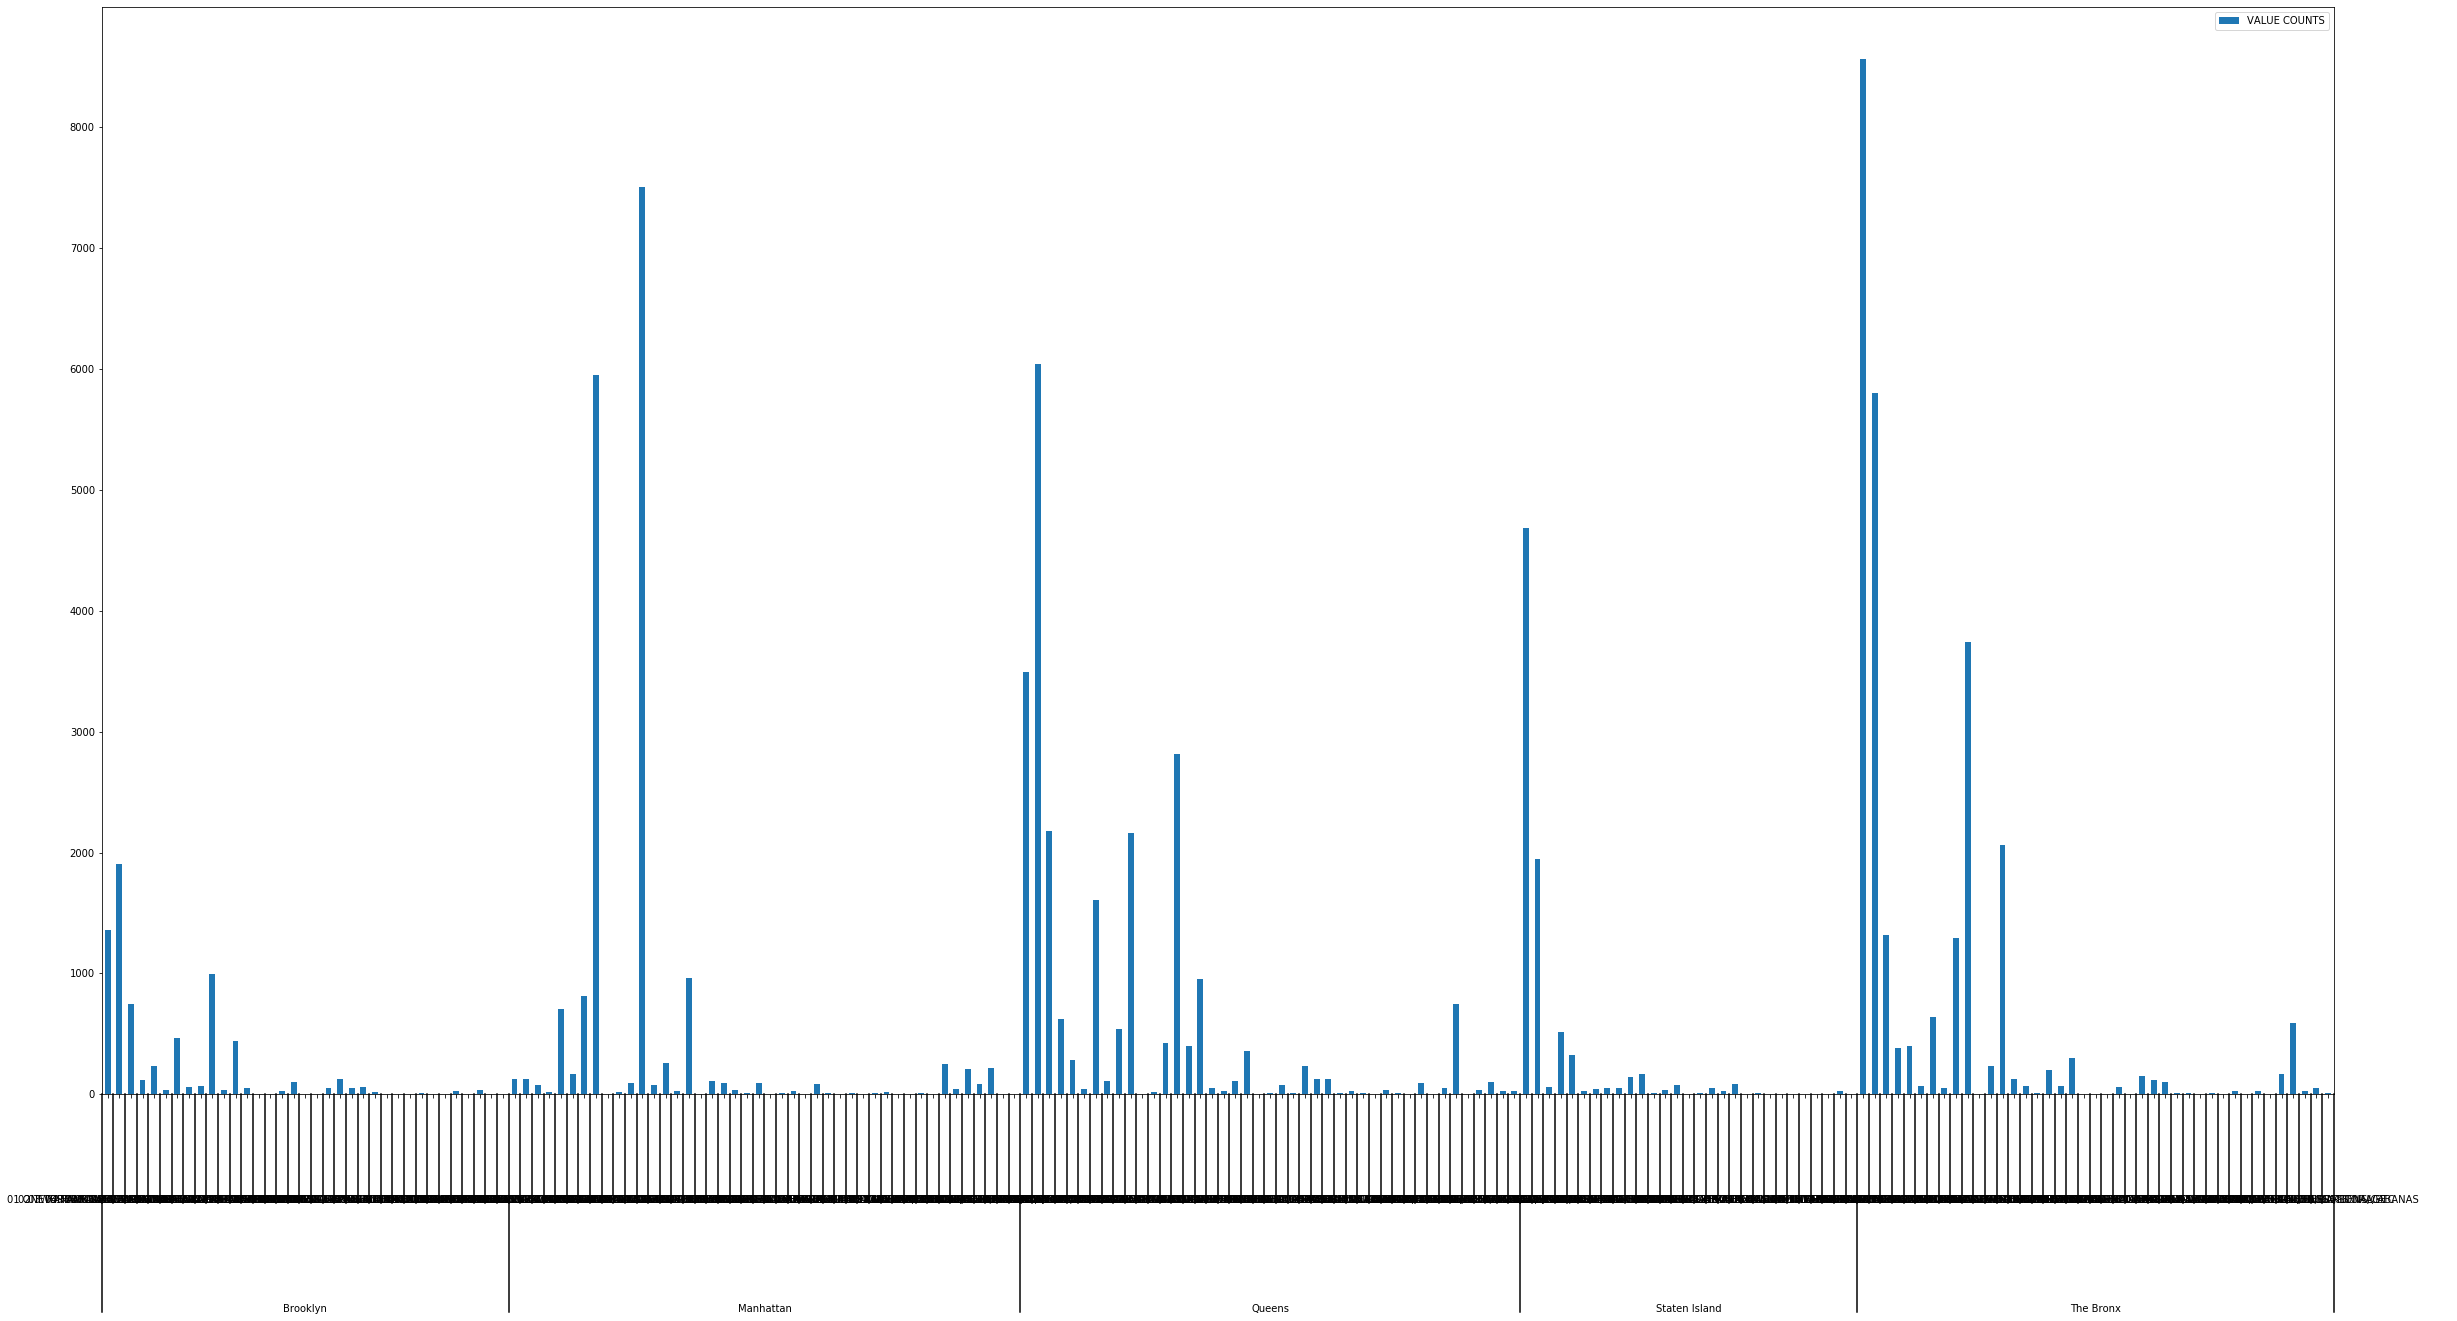

In [471]:
#Grouping by Borough and Building Class Category
sales_frame_borough = sales_frame.groupby(["BOROUGH"])
groupedby_borough_building_class = sales_frame_borough["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_borough_building_class.columns = ["BOROUGH", "BUILDING CLASS CATEGORY", "VALUE COUNTS"]

def test_table():
    data_table = groupedby_borough_building_class
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + 0.5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = test_table().groupby(["BOROUGH", "BUILDING CLASS CATEGORY"]).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca(), figsize=(40,20), rot=90)
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.title("Properties sold by Borough and Building Class")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig("data/Properties sold by BBC 16_17.jpg", bbox_inches="tight")
plt.show()

# Printing new dataframe
#print(groupedby_borough_building_class)

# Grouping by Building Class Category
groupedby_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_building_class.columns = ["BUILDING CLASS CATEGORY", "VALUE COUNTS"]

#Printing new dataframe
#print(groupedby_building_class)

# Visualizing and saving image
groupedby_building_class.plot.bar(x="BUILDING CLASS CATEGORY", y="VALUE COUNTS", title="Properties sold by Building Class", figsize=(20,10))
plt.savefig("data/Properties sold by BC 16_17.jpg", bbox_inches="tight")

# Grouping by Borough and Building Class Category
sales_frame_borough_price = sales_frame.groupby(["BOROUGH"])
groupedby_borough_price = sales_frame_borough_price["SALE PRICE"].sum().reset_index(name="Index")
groupedby_borough_price.columns = ["BOROUGH", "SALE PRICE"]

# Sorting after highest value
groupedby_borough_price = groupedby_borough_price.sort_values("SALE PRICE", ascending=False)

# Suppressing scientific float notation
pd.options.display.float_format = "{:.2f}".format

# Printing new dataframe
print(groupedby_borough_price)

# Exporting csv of sales prices grouped by borough
#groupedby_borough_price.to_csv("data/groupedby_borough_price_1617.csv", index_label=["Index"])

# Visualizing and saving image
groupedby_borough_price.plot.bar(x="BOROUGH", y="SALE PRICE", title="Property values sold by borough", figsize=(20,10))
plt.savefig("data/Property values sold by borough 16_17.jpg", bbox_inches="tight")


### 2016

In [ ]:
#Calculating number of sales/mean/median and top sale in 2016
sales_2016 = sales_frame[sales_frame["SALE DATE"].dt.year == 2016]
sales_max_2016 = sales_2016["SALE PRICE"].max()
sales_mean_2016 = sales_2016["SALE PRICE"].mean()
sales_total_2016 = sales_2016["SALE PRICE"].sum()
sales_median_2016 = sales_2016["SALE PRICE"].median()

# Adjusting mean because of $0 sales
sales_2016_adj = sales_2016[sales_2016["SALE PRICE"] > 0]
sales_2016_mean_adj = sales_2016_adj["SALE PRICE"].mean()

print("The number of sales in the year 2016 was ", len(sales_2016), " with the most expensive sale price being $", int(sales_max_2016), " and the average sale being $", int(sales_mean_2016), ".", sep="")
print("\nThe adjusted mean (dataframe cleared of $0 sales) is slightly higher being $", int(sales_2016_mean_adj), ".", sep="")
print("\nThe high number of $0 sales also lowers the median sale price to $", int(sales_median_2016), ".", sep="")
print("\nThe total amount spent for property sales in 2016 was $", int(sales_total_2016), ".", sep="")

### 2017

In [ ]:
# Calculating number of sales/mean/median and top sale in 2017
sales_2017 = sales_frame[sales_frame["SALE DATE"].dt.year == 2017]
sales_max_2017 = sales_2017["SALE PRICE"].max()
sales_mean_2017 = sales_2017["SALE PRICE"].mean()
sales_total_2017 = sales_2017["SALE PRICE"].sum()
sales_median_2017 = sales_2017["SALE PRICE"].median()

# Adjusting mean because of $0 sales
sales_2017_adj = sales_2017[sales_2017["SALE PRICE"] > 0]
sales_2017_mean_adj = sales_2017_adj["SALE PRICE"].mean()

# Printing all the results
print("The number of sales in the year 2017 was ", len(sales_2017), " with the most expensive sale being $", int(sales_max_2017), " and the average sale price being $", int(sales_mean_2017),".", sep="")
print("\nThe adjusted mean (dataframe cleared of $0 sales) is slightly higher being $", int(sales_2017_mean_adj), ".", sep="")
print("\nThe high number of $0 sales also lowers the median sale price to $", int(sales_median_2017), ".", sep="")
print("\nThe total amount spent for property sales in 2017 was $", int(sales_total_2017), ".", sep="")

## Sales per Month


##### January

In [ ]:
sales_jan_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 1]
print("2016:", len(sales_jan_2016))
sales_jan_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 1]
print("2017:", len(sales_jan_2017))

##### February

In [ ]:
sales_feb_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 2]
print("2016:", len(sales_feb_2016))
sales_feb_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 2]
print("2017:", len(sales_feb_2017))

##### March

In [ ]:
sales_mar_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 3]
print("2016:", len(sales_mar_2016))
sales_mar_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 3]
print("2017:", len(sales_mar_2017))

##### April

In [ ]:
sales_apr_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 4]
print("2016:", len(sales_apr_2016))
sales_apr_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 4]
print("2017:", len(sales_apr_2017))

##### May

In [ ]:
sales_may_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 5]
print("2016:", len(sales_may_2016))
sales_may_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 5]
print("2017:", len(sales_may_2017))

##### June

In [ ]:
sales_jun_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 6]
print("2016:", len(sales_jun_2016))
sales_jun_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 6]
print("2017:", len(sales_jun_2017))

##### July

In [ ]:
sales_jul_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 7]
print("2016:", len(sales_jul_2016))
sales_jul_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 7]
print("2017:", len(sales_jul_2017))

##### August

In [ ]:
sales_aug_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 8]
print("2016:", len(sales_aug_2016))
sales_aug_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 8]
print("2017:", len(sales_aug_2017))

##### September

In [ ]:
sales_sep_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 9]
print("2016:", len(sales_sep_2016))
sales_sep_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 9]
print("2017:", len(sales_sep_2017))

##### October

In [ ]:
sales_oct_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 10]
print("2016:", len(sales_oct_2016))
sales_oct_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 10]
print("2017:", len(sales_oct_2017))

##### November

In [ ]:
sales_nov_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 11]
print("2016:", len(sales_nov_2016))
sales_nov_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 11]
print("2017:", len(sales_nov_2017))

##### December

In [ ]:
sales_dec_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 12]
print("2016:", len(sales_dec_2016))
sales_dec_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 12]
print("2017:", len(sales_dec_2017))

## Transactions without Sale Price

In [ ]:
# Calculating sales without sale price
sales_zero = sales_frame[sales_frame["SALE PRICE"] == 0]
print("The number of property sales with a sale price of $0 is ", len(sales_zero), ".", sep="")

# Measuring total number of sales
print("The number of all property sales is ", len(sales_frame), ".", sep="")

# Sales without sale price in relation to all sales
sales_zero_percent = len(sales_frame[sales_frame["SALE PRICE"] == 0]) / len(sales_frame)
print("This equals to about ", round(sales_zero_percent * 100, 2), "%", sep="")

# Filtering dataframe "sales_zero" by borough
sales_zero_borough = sales_zero.groupby(["BOROUGH"])
groupedby_zero_borough = sales_zero_borough["SALE PRICE"].value_counts().reset_index(name="Index")
groupedby_zero_borough.columns = ["BOROUGH", "SALE PRICE", "VALUE COUNTS"]

# Printing new dataframe
#print(groupedby_zero_borough)

# Visualizing and saving image
groupedby_zero_borough.plot.bar(x="BOROUGH", y="VALUE COUNTS", title="Properties with $0 sale price per borough in 16/17")

plt.savefig("data/Properties with $0 sale price per borough 16_17.jpg", bbox_inches="tight")

#### Reasons for that

In [ ]:
# Reasons for sale price of $0
print("\nA $0 sale indicates that there was a transfer of ownership without cash consideration. \nThere can be a number of reasons for that, for example transfers of ownership from parents to children.")
sales_almost_zero = sales_frame[(sales_frame["SALE PRICE"] < 100) & sales_frame["SALE PRICE"] != 0]
print("\nThere is also a small number of sales (", len(sales_almost_zero), ") that were made for insignificant values (for example < $100), which suggests the same as above.", sep="")

## Locations of properties


### Sales in different boroughs

In [ ]:
# Sorting the sales by boroughs
sales_manhattan = sales_frame[sales_frame["BOROUGH"] == "Manhattan"]
sales_brooklyn = sales_frame[sales_frame["BOROUGH"] == "Queens"]
sales_queens = sales_frame[sales_frame["BOROUGH"] == "Brooklyn"]
sales_the_bronx = sales_frame[sales_frame["BOROUGH"] == "The Bronx"]
sales_staten_island = sales_frame[sales_frame["BOROUGH"] == "Staten Island"]
print("(1) Manhattan:", len(sales_manhattan))
print("(2) Brooklyn:", len(sales_brooklyn))
print("(3) Queens:", len(sales_queens))
print("(4) The Bronx:", len(sales_the_bronx))
print("(5) Staten Island:", len(sales_staten_island))

### Sales in different neighborhoods


#### Top in Manhattan

In [ ]:
sales_m_neighbor = sales_manhattan["NEIGHBORHOOD"].value_counts()
print(sales_m_neighbor.nlargest(10))

#### Top in Brooklyn

In [ ]:
sales_b_neighbor = sales_brooklyn["NEIGHBORHOOD"].value_counts()
print(sales_b_neighbor.nlargest(10))

#### Top in Queens

In [ ]:
sales_q_neighbor = sales_queens["NEIGHBORHOOD"].value_counts()
print(sales_q_neighbor.nlargest(10))

#### Top in The Bronx

In [ ]:
sales_tb_neighbor = sales_the_bronx["NEIGHBORHOOD"].value_counts()
print(sales_tb_neighbor.nlargest(10))

#### Top in Staten Island

In [ ]:
sales_si_neighbor = sales_staten_island["NEIGHBORHOOD"].value_counts()
print(sales_si_neighbor.nlargest(10))

### Buildings sold per building class

In [ ]:
# Sales per building class category
sales_per_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts()
print(sales_per_building_class)

# Grouping sales by borough, neighborhood and building class category
sales_grouped = sales_frame.groupby(['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']).sum()
columns_del = [ "BLOCK", "LOT", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "YEAR BUILT", "TAX CLASS AT TIME OF SALE"]
sales_grouped = sales_grouped.drop(columns_del, 1)
sales_grouped_desc = sales_grouped.sort_values(by=["SALE PRICE"], ascending=False)
print(sales_grouped_desc)

#exporting csv of sales value grouped by borough, neighborhood, building class category
#sales_grouped_desc.to_csv("data/grouped_sales.csv", index_label=["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY"])
